In [55]:
sc

In [56]:
import pandas as pd
from ggplot import *
import numpy as np
%matplotlib inline

In [57]:
data = pd.read_csv("csv/notes.csv",
                   header=None)

In [58]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,510350,en_AUS_austra_int,2014-03-04 04:18:01,Loyalties strained behind enemy lines,AN showdown between a Ukrainian naval chief wh...,en,AUS,austra,int,0
1,510832,en_AUS_austra_int,2014-03-04 05:18:00,Loyalties strained behind enemy lines,A SHOWDOWN between a Ukrainian naval chief who...,en,AUS,austra,int,0
2,517996,en_AUS_austra_int,2014-03-05 00:17:52,Strange standoff between former allies,SURROUNDED by the Russian forces who took over...,en,AUS,austra,int,0
3,526667,en_AUS_austra_int,2014-03-06 00:18:37,UN envoy hounded out of Crimea,UN ENVOY Robert Serry was on the phone in a ca...,en,AUS,austra,int,0
4,525931,en_AUS_austra_int,2014-03-05 22:18:39,UN envoy menaced out of Crimea,A UN special envoy has cut short his mission i...,en,AUS,austra,int,0


/home/Pankracy/Envs/ipython-spark/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


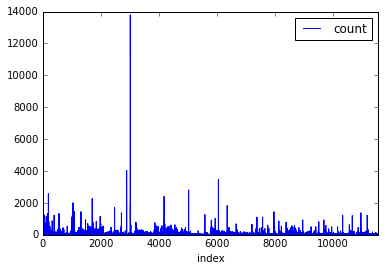

In [59]:
counts = data.groupby(9).agg(['count'])
counts['index'] = range(1, len(counts) + 1)
counts2 = counts[0]
counts2['index'] = range(1, len(counts) + 1)
counts2.plot(x='index', y='count')

In [60]:
notes_data = sc.textFile("csv/notes.csv").map(lambda line: line.split(","))
notes_data_df = notes_data.toDF()
notes_data_df.show()

_1     _2                _3                  _4                   _5                   _6 _7  _8     _9  _10
510350 en_AUS_austra_int 2014-03-04 04:18:01 Loyalties straine... AN showdown betwe... en AUS austra int 0  
510832 en_AUS_austra_int 2014-03-04 05:18:00 Loyalties straine... A SHOWDOWN betwee... en AUS austra int 0  
517996 en_AUS_austra_int 2014-03-05 00:17:52 Strange standoff ... SURROUNDED by the... en AUS austra int 0  
526667 en_AUS_austra_int 2014-03-06 00:18:37 UN envoy hounded ... UN ENVOY Robert S... en AUS austra int 0  
525931 en_AUS_austra_int 2014-03-05 22:18:39 UN envoy menaced ... A UN special envo... en AUS austra int 0  
526378 en_AUS_austra_int 2014-03-05 23:18:38 UN envoy menaced ... UN ENVOY Robert S... en AUS austra int 0  
500270 en_AUS_austra_int 2014-03-02 22:16:47 Russia tightens g... RUSSIAN forces ha... en AUS austra int 0  
501229 en_AUS_austra_int 2014-03-03 01:16:44 Russia tightens g... RUSSIAN forces ha... en AUS austra int 0  
481196 en_AUS_austr

In [61]:
from dateutil.parser import parse
import datetime

dates = notes_data_df.map(lambda line: parse(line[2])).collect()

In [62]:
dates_map = notes_data_df.map(lambda x: (int(x._10), parse(x._3)))
dates_min = dates_map.reduceByKey(lambda x,y: x if x < y else y)
dates_max = dates_map.reduceByKey(lambda x,y: x if x > y else y)
dates_for_cluster = dates_max.join(dates_min).map(lambda x: (x[0], (x[1][0] - x[1][1]).days)).collect()

In [63]:
dates_for_cluster

[(0, 70),
 (8192, 206),
 (8, 527),
 (16, 539),
 (5464, 72),
 (24, 526),
 (32, 392),
 (16424, 450),
 (48, 529),
 (8200, 136),
 (56, 539),
 (64, 344),
 (1376, 440),
 (72, 197),
 (16464, 410),
 (88, 404),
 (8288, 213),
 (8208, 220),
 (104, 500),
 (8304, 198),
 (13672, 365),
 (16504, 0),
 (8320, 237),
 (10944, 41),
 (136, 342),
 (144, 514),
 (8216, 356),
 (8344, 158),
 (160, 544),
 (17776, 147),
 (168, 406),
 (176, 8),
 (15048, 280),
 (184, 544),
 (16576, 278),
 (8224, 167),
 (8392, 129),
 (208, 472),
 (16600, 269),
 (8416, 141),
 (15056, 116),
 (232, 530),
 (240, 491),
 (40, 543),
 (16632, 1),
 (16640, 263),
 (1408, 148),
 (264, 373),
 (16656, 1),
 (15064, 344),
 (280, 543),
 (8480, 46),
 (8240, 211),
 (8488, 157),
 (16688, 77),
 (1416, 0),
 (312, 383),
 (8512, 149),
 (6880, 470),
 (1920, 254),
 (8520, 164),
 (336, 449),
 (16440, 233),
 (344, 234),
 (1648, 241),
 (16736, 302),
 (8552, 134),
 (368, 214),
 (2792, 2),
 (8568, 103),
 (384, 544),
 (16448, 387),
 (12288, 220),
 (16776, 131),
 (

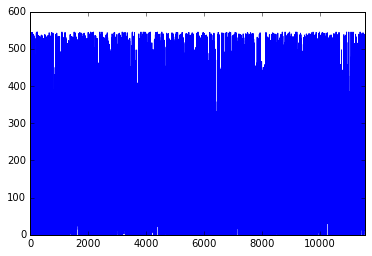

In [64]:
dates_for_cluster_df = pd.DataFrame(dates_for_cluster)
dates_for_cluster_df[1].plot()

In [65]:
print "std:", dates_for_cluster_df[1].std()
print "mean:", dates_for_cluster_df[1].mean()
print "median:", dates_for_cluster_df[1].median()
print "min:", dates_for_cluster_df[1].min()
print "max:", dates_for_cluster_df[1].max()

std: 168.771130156
mean: 204.807842119
median: 171.0
min: 0
max: 545


{0: 1577, 1: 214, 2: 265, 3: 206, 4: 405, 5: 293, 6: 243, 7: 205, 8: 190, 9: 212, 10: 208, 11: 258, 12: 263, 13: 300, 14: 309, 15: 253, 16: 330, 17: 332, 18: 307, 19: 260, 20: 356, 21: 363, 22: 256, 23: 199, 24: 95, 25: 138, 26: 109, 27: 94, 28: 76, 29: 59, 30: 98, 31: 74, 32: 86, 33: 82, 34: 70, 35: 61, 36: 53, 37: 104, 38: 102, 39: 92, 40: 125, 41: 123, 42: 166, 43: 206, 44: 192, 45: 192, 46: 146, 47: 82, 48: 111, 49: 97, 50: 116, 51: 178, 52: 198, 53: 264, 54: 160}
[(0, 1577), (1, 214), (2, 265), (3, 206), (4, 405), (5, 293), (6, 243), (7, 205), (8, 190), (9, 212), (10, 208), (11, 258), (12, 263), (13, 300), (14, 309), (15, 253), (16, 330), (17, 332), (18, 307), (19, 260), (20, 356), (21, 363), (22, 256), (23, 199), (24, 95), (25, 138), (26, 109), (27, 94), (28, 76), (29, 59), (30, 98), (31, 74), (32, 86), (33, 82), (34, 70), (35, 61), (36, 53), (37, 104), (38, 102), (39, 92), (40, 125), (41, 123), (42, 166), (43, 206), (44, 192), (45, 192), (46, 146), (47, 82), (48, 111), (49, 97),

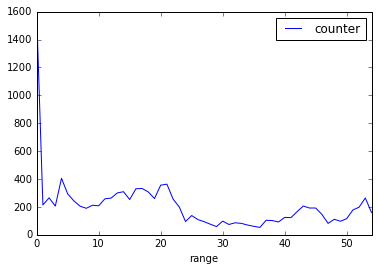

In [66]:
import operator

buckets = {}
for i,r in dates_for_cluster_df.iterrows():
    new_index = (r[1] / 10)
    if new_index in buckets:
        buckets[new_index] += 1
    else:
        buckets[new_index] = 1
print buckets
buckets_sorted = sorted(buckets.items(), key=operator.itemgetter(0), reverse=False)
print buckets_sorted
buckets_df = pd.DataFrame(buckets_sorted, columns=['range', 'counter'])
buckets_df.plot(x='range', y='counter')

In [67]:
paper_map = notes_data_df.map(lambda x: (int(x._10), (x._8, parse(x._3)))) \
    .reduceByKey(lambda x,y: x if (x[1] < y[1]) else y) \
    .map(lambda (key, value): (key, value[0])) \
    .collect()

In [68]:
map1 = map(lambda x: (x[1], 1), paper_map)
map2 = {}
for i in map1:
    if i[0] in map2:
        map2[i[0]] += 1
    else:
        map2[i[0]] = 1
 
sorted_x = sorted(map2.items(), key=operator.itemgetter(1), reverse=True)
sorted_x

[(u'nzhera', 1451),
 (u'guardi', 1084),
 (u'univer', 919),
 (u'thiday', 778),
 (u'dailyt', 614),
 (u'hersun', 597),
 (u'nytime', 512),
 (u'lmonde', 491),
 (u'starmy', 470),
 (u'chinad', 379),
 (u'twoday', 363),
 (u'elpais', 298),
 (u'starca', 243),
 (u'austra', 239),
 (u'nacion', 237),
 (u'mercur', 227),
 (u'mopost', 225),
 (u'newint', 216),
 (u'catalu', 206),
 (u'lesoir', 202),
 (u'larazo', 188),
 (u'tindia', 185),
 (u'tercer', 180),
 (u'wapost', 172),
 (u'hindti', 163),
 (u'lepari', 157),
 (u'tmalta', 127),
 (u'jormex', 101),
 (u'derheu', 95),
 (u'jmontr', 92),
 (u'patria', 86),
 (u'xpress', 82),
 (u'jatime', 80),
 (u'chroni', 51),
 (u'elwata', 43)]

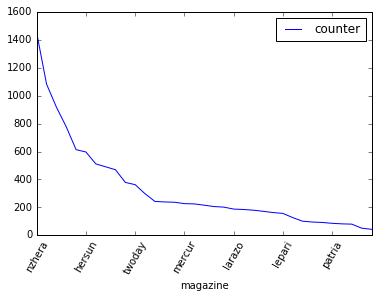

In [69]:
first_magazine_df = pd.DataFrame(sorted_x, columns=['magazine', 'counter'])
first_magazine_df.plot(x='magazine', y='counter', rot=60)

In [70]:
clusters_data = sc.textFile("csv/clusters.csv").map(lambda line: line.split(",")[:6])
clusters_data_df = clusters_data.toDF()
clusters_data_df = clusters_data_df \
    .withColumnRenamed('_1', 'cluster_id') \
    .withColumnRenamed('_2', 'tag1') \
    .withColumnRenamed('_3', 'tag2') \
    .withColumnRenamed('_4', 'tag3') \
    .withColumnRenamed('_5', 'tag4') \
    .withColumnRenamed('_6', 'tag5')

In [71]:
clusters_data_df.show()

cluster_id tag1      tag2        tag3       tag4      tag5       
0          russian   crimea      ukraine    russia    ukrainian  
1          fire      test        korea      north     missiles   
2          anti      rally       europe     semitic   islam      
3          turkey    erdogan     tayyip     turkish   recep      
4          will      pay         plans      tax       years      
5          barack    afghanistan planning   troops    obama      
6          guards    appeal      conviction assange   court      
7          risk      men         brother    sex       women      
8          face      defence     challenge  fresh     chief      
9          malaysia  mh370       search     ship      signal     
10         middle    israel      east       israeli   palestinian
11         accused   scandal     cash       twitter   helping    
12         australia george      wife       prince    william    
13         night     town        control    city      kenyan     
14        

In [72]:
notes_data_df = notes_data_df \
    .withColumnRenamed('_1', 'id') \
    .withColumnRenamed('_2', 'paper_id') \
    .withColumnRenamed('_3', 'date') \
    .withColumnRenamed('_4', 'title') \
    .withColumnRenamed('_5', 'description') \
    .withColumnRenamed('_6', 'lang') \
    .withColumnRenamed('_7', 'country') \
    .withColumnRenamed('_8', 'paper') \
    .withColumnRenamed('_9', '_9') \
    .withColumnRenamed('_10', 'cluster_id')
notes_data_df.show()

id     paper_id          date                title                description          lang country paper  _9  cluster_id
510350 en_AUS_austra_int 2014-03-04 04:18:01 Loyalties straine... AN showdown betwe... en   AUS     austra int 0         
510832 en_AUS_austra_int 2014-03-04 05:18:00 Loyalties straine... A SHOWDOWN betwee... en   AUS     austra int 0         
517996 en_AUS_austra_int 2014-03-05 00:17:52 Strange standoff ... SURROUNDED by the... en   AUS     austra int 0         
526667 en_AUS_austra_int 2014-03-06 00:18:37 UN envoy hounded ... UN ENVOY Robert S... en   AUS     austra int 0         
525931 en_AUS_austra_int 2014-03-05 22:18:39 UN envoy menaced ... A UN special envo... en   AUS     austra int 0         
526378 en_AUS_austra_int 2014-03-05 23:18:38 UN envoy menaced ... UN ENVOY Robert S... en   AUS     austra int 0         
500270 en_AUS_austra_int 2014-03-02 22:16:47 Russia tightens g... RUSSIAN forces ha... en   AUS     austra int 0         
501229 en_AUS_austra_int

In [73]:
big_table = clusters_data_df.join(notes_data_df, clusters_data_df.cluster_id == notes_data_df.cluster_id)
big_table.show()

cluster_id tag1     tag2      tag3   tag4   tag5   id      paper_id          date                title                description          lang country paper  _9  cluster_id
32         daughter kidnapped years  mother dad    1281428 en_AUS_austra_int 2014-04-21 16:47:36 Suharto daughter ... GOLKAR is claimin... en   AUS     austra int 32        
32         daughter kidnapped years  mother dad    1309101 en_AUS_austra_int 2014-04-22 02:47:36 Tycoon buys daugh... WHEN the daughter... en   AUS     austra int 32        
32         daughter kidnapped years  mother dad    92523   en_AUS_austra_int 2014-01-04 18:41:45 Mother daughter d... A MOTHER and daug... en   AUS     austra int 32        
32         daughter kidnapped years  mother dad    1691573 en_AUS_austra_int 2014-05-22 01:56:27 Kidnapped woman a... A WOMAN who was a... en   AUS     austra int 32        
32         daughter kidnapped years  mother dad    3104675 en_AUS_austra_int 2014-09-30 03:33:24 Aus woman pleads ... DOROTHY Barn

In [85]:
big_table_with_papers = big_table.map(lambda x: (x.paper, [x.tag1, x.tag2, x.tag3, x.tag4, x.tag5]))
# big_table_with_papers.collect()

In [86]:
big_table_merge_tags = big_table_with_papers.reduceByKey(lambda x, y: x+y)
# big_table_merge_tags.collect()

In [76]:
import operator
def wordcount(words):
    dictionary = {}
    for word in words:
        if word in dictionary:
            dictionary[word] += 1
        else:
            dictionary[word] = 0
    sorted_dictionary = sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_dictionary
wordcount(['a','b','a'])
counted_big_table = big_table_merge_tags.map(lambda (key, value): (key, wordcount(value)))
counted_big_table_collected = counted_big_table.collect()

In [90]:
# counted_big_table_collected

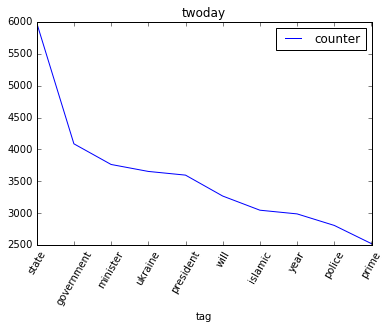

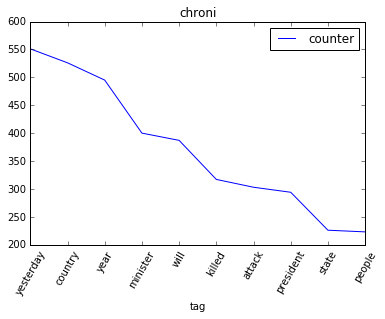

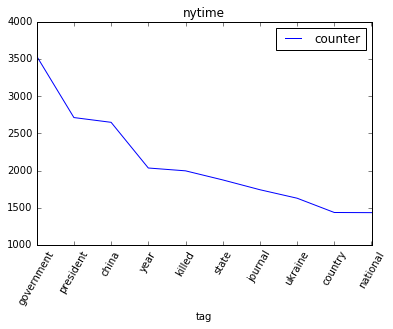

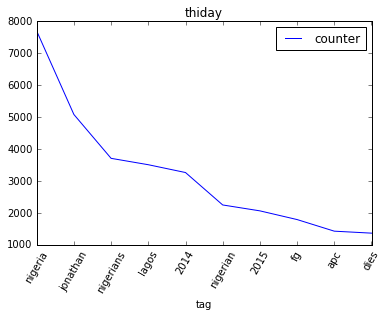

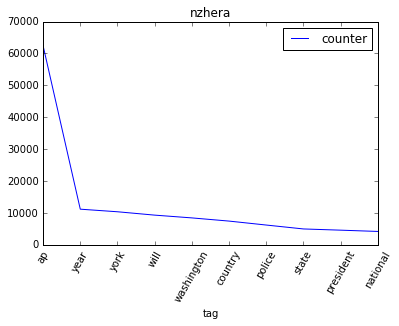

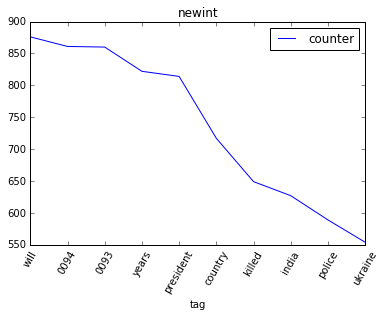

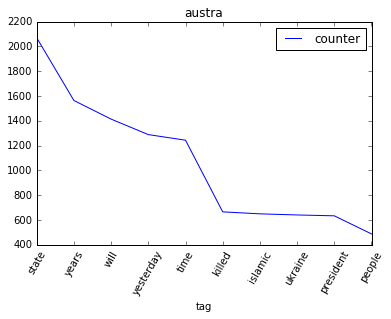

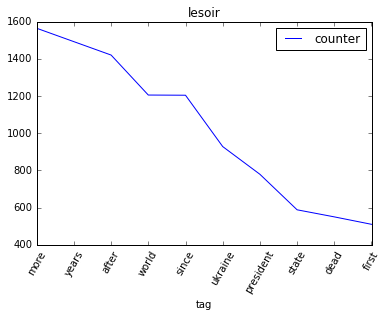

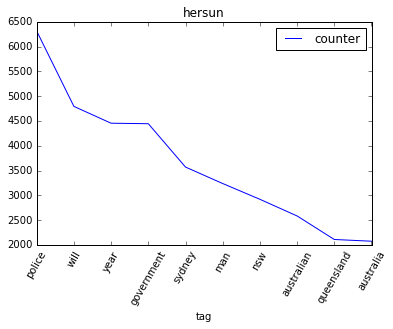

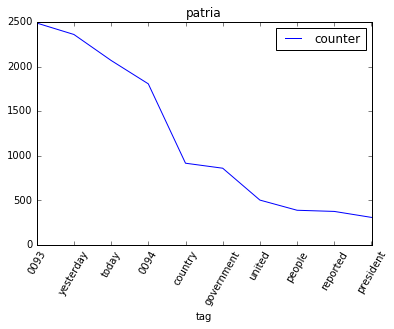

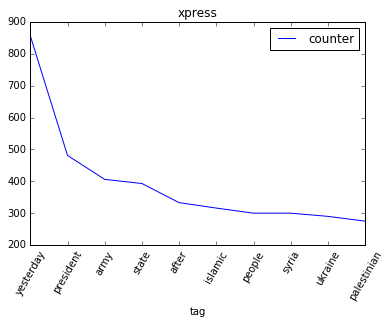

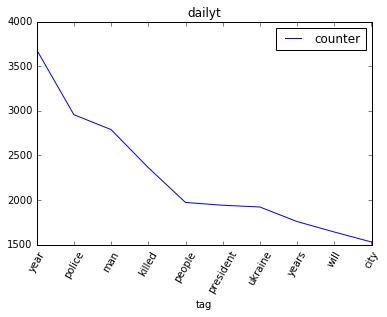

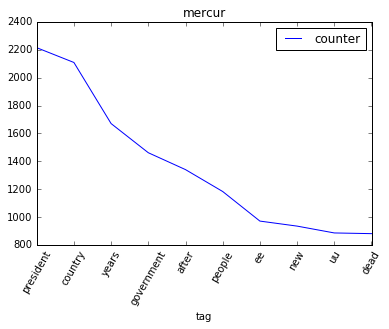

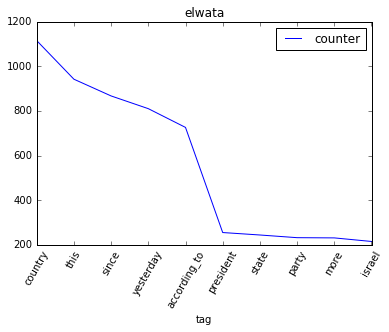

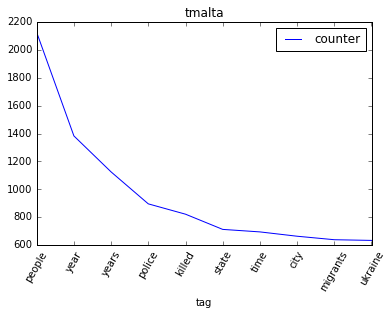

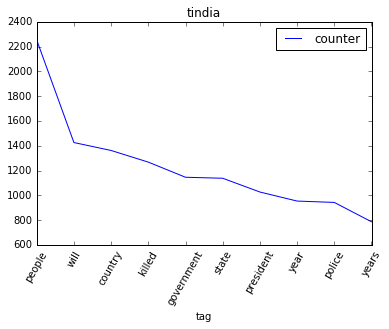

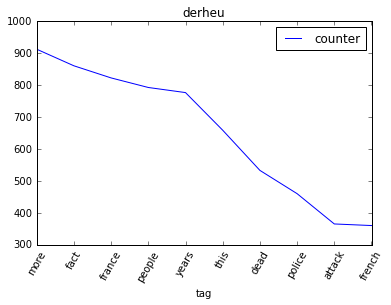

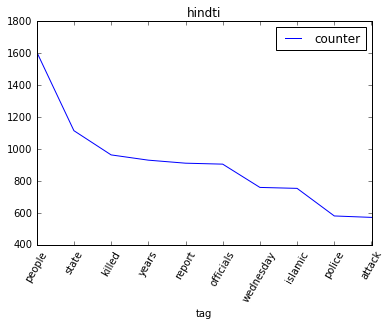

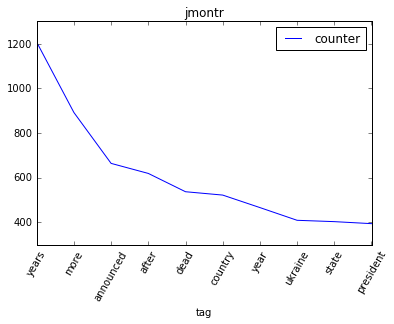

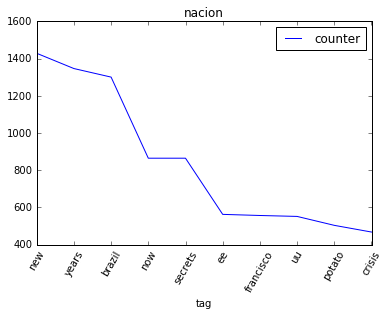

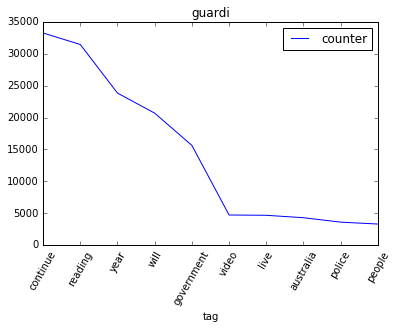

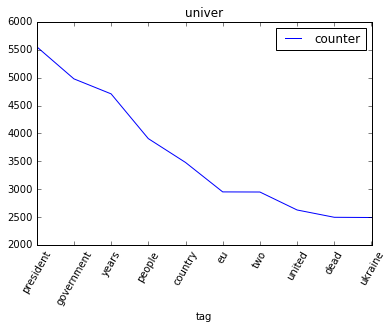

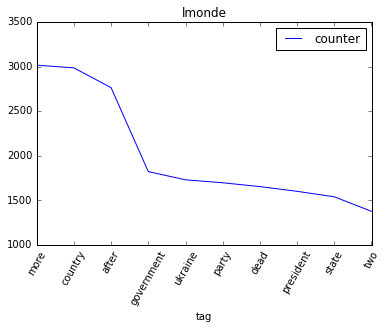

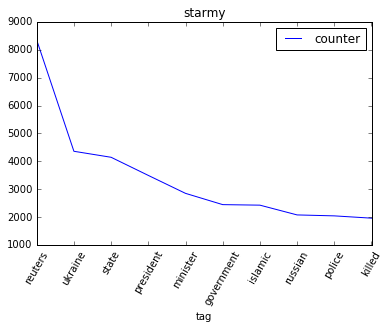

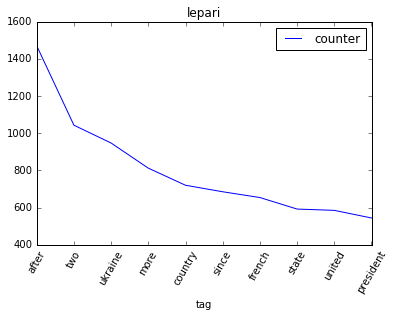

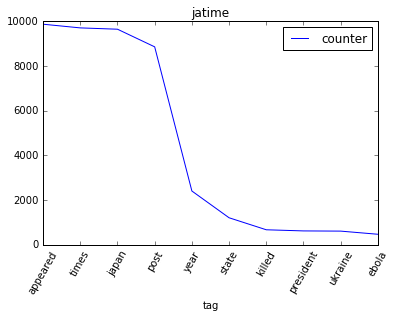

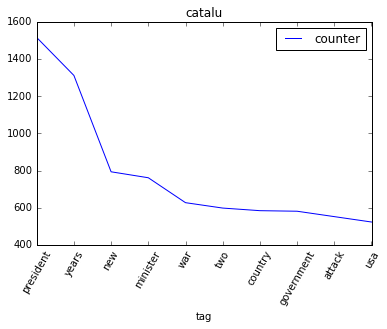

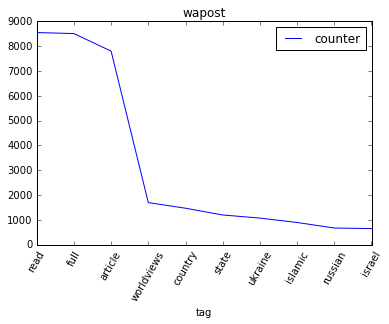

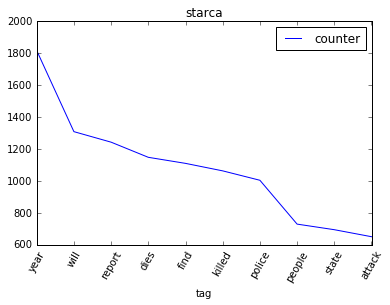

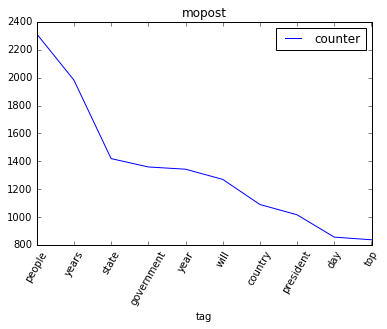

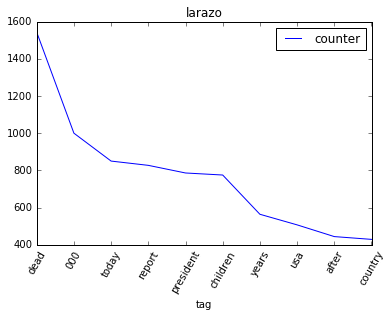

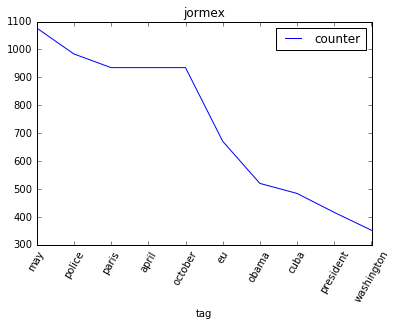

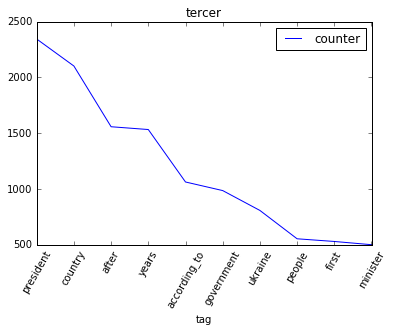

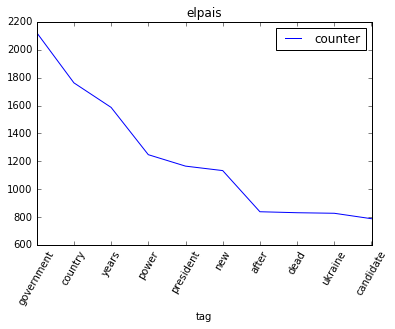

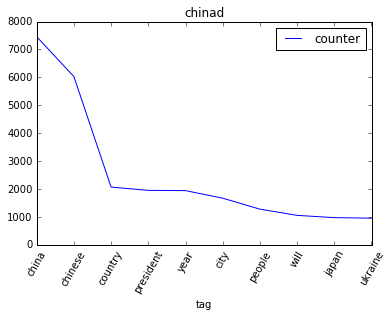

In [78]:
import pandas as pd

counted_tags_data_frames = []
for item in counted_big_table_collected:
    df = pd.DataFrame(item[1][:10], columns=['tag', 'counter'])
    counted_tags_data_frames.append((item[0], df))

for paper in counted_tags_data_frames:
    paper[1].plot(x='tag', y='counter', title=paper[0], rot=60)